In [18]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Model

In [19]:
from keras.layers import *


In [20]:
x = Input(shape=(3,))

In [21]:
hidden1 = Dense(128, activation='relu')(x)
hidden2 = Dense(64, activation='relu')(hidden1)

output1 = Dense(1, activation='linear')(hidden2)
output2 = Dense(1, activation='sigmoid')(output1)


In [22]:
model = Model(inputs = x , outputs = [output1, output2] )


In [23]:
model.summary()

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)      │ (None, 3)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 128)            │           512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 1)              │            65 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 1)              │             2 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,835 (34.51 KB)

 Trainable params: 8,835 (34.51 KB)

 Non-trainable params: 0 (0.00 B)

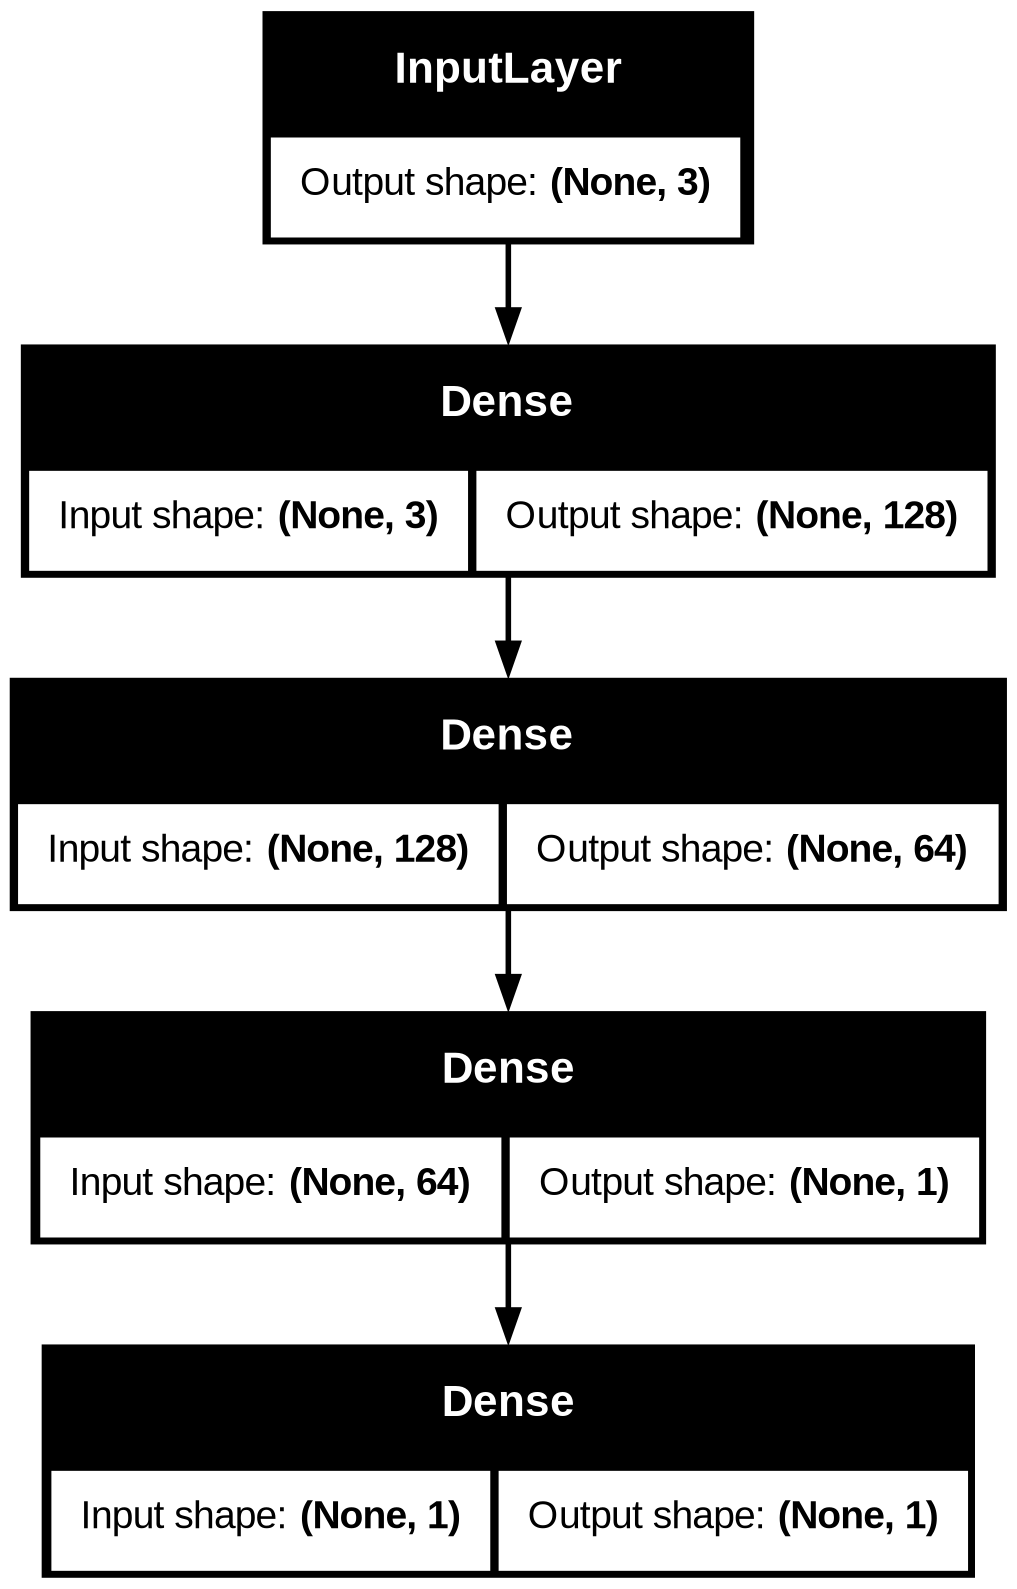

In [24]:
from keras.utils import plot_model
plot_model(model,show_shapes=True)

In [25]:
# pip install pydot

In [26]:
inputA = Input(shape=(32,))
inputB = Input(shape=(128,))

In [27]:
x = Dense(8, activation='relu')(inputA)
x1 = Dense(4, activation='relu')(x)

In [28]:
y = Dense(64, activation='relu')(inputB)
y1 = Dense(32, activation='relu')(y)
y2 = Dense(4, activation='relu')(y1)

In [29]:
combine = concatenate([x1, y2])

In [30]:
z = Dense(2, activation='sigmoid')(combine)
z1 = Dense(1, activation='linear')(z)

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_5       │ (None, 128)       │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_layer_4       │ (None, 32)        │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_17 (Dense)    │ (None, 64)        │      8,256 │ input_layer_5[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_15 (Dense)    │ (None, 8)         │        264 │ input_layer_4[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_18 (Dense)    │ (None, 32)        │      2,080 │ dense_17[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_16 (Dense)    │ (None, 4)         │         36 │ dense_15[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_19 (Dense)    │ (None, 4)         │        132 │ dense_18[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_1       │ (None, 8)         │          0 │ dense_16[0][0],   │
│ (Concatenate)       │                   │            │ dense_19[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_20 (Dense)    │ (None, 2)         │         18 │ concatenate_1[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_21 (Dense)    │ (None, 1)         │          3 │ dense_20[0][0]    │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 10,789 (42.14 KB)

 Trainable params: 10,789 (42.14 KB)

 Non-trainable params: 0 (0.00 B)

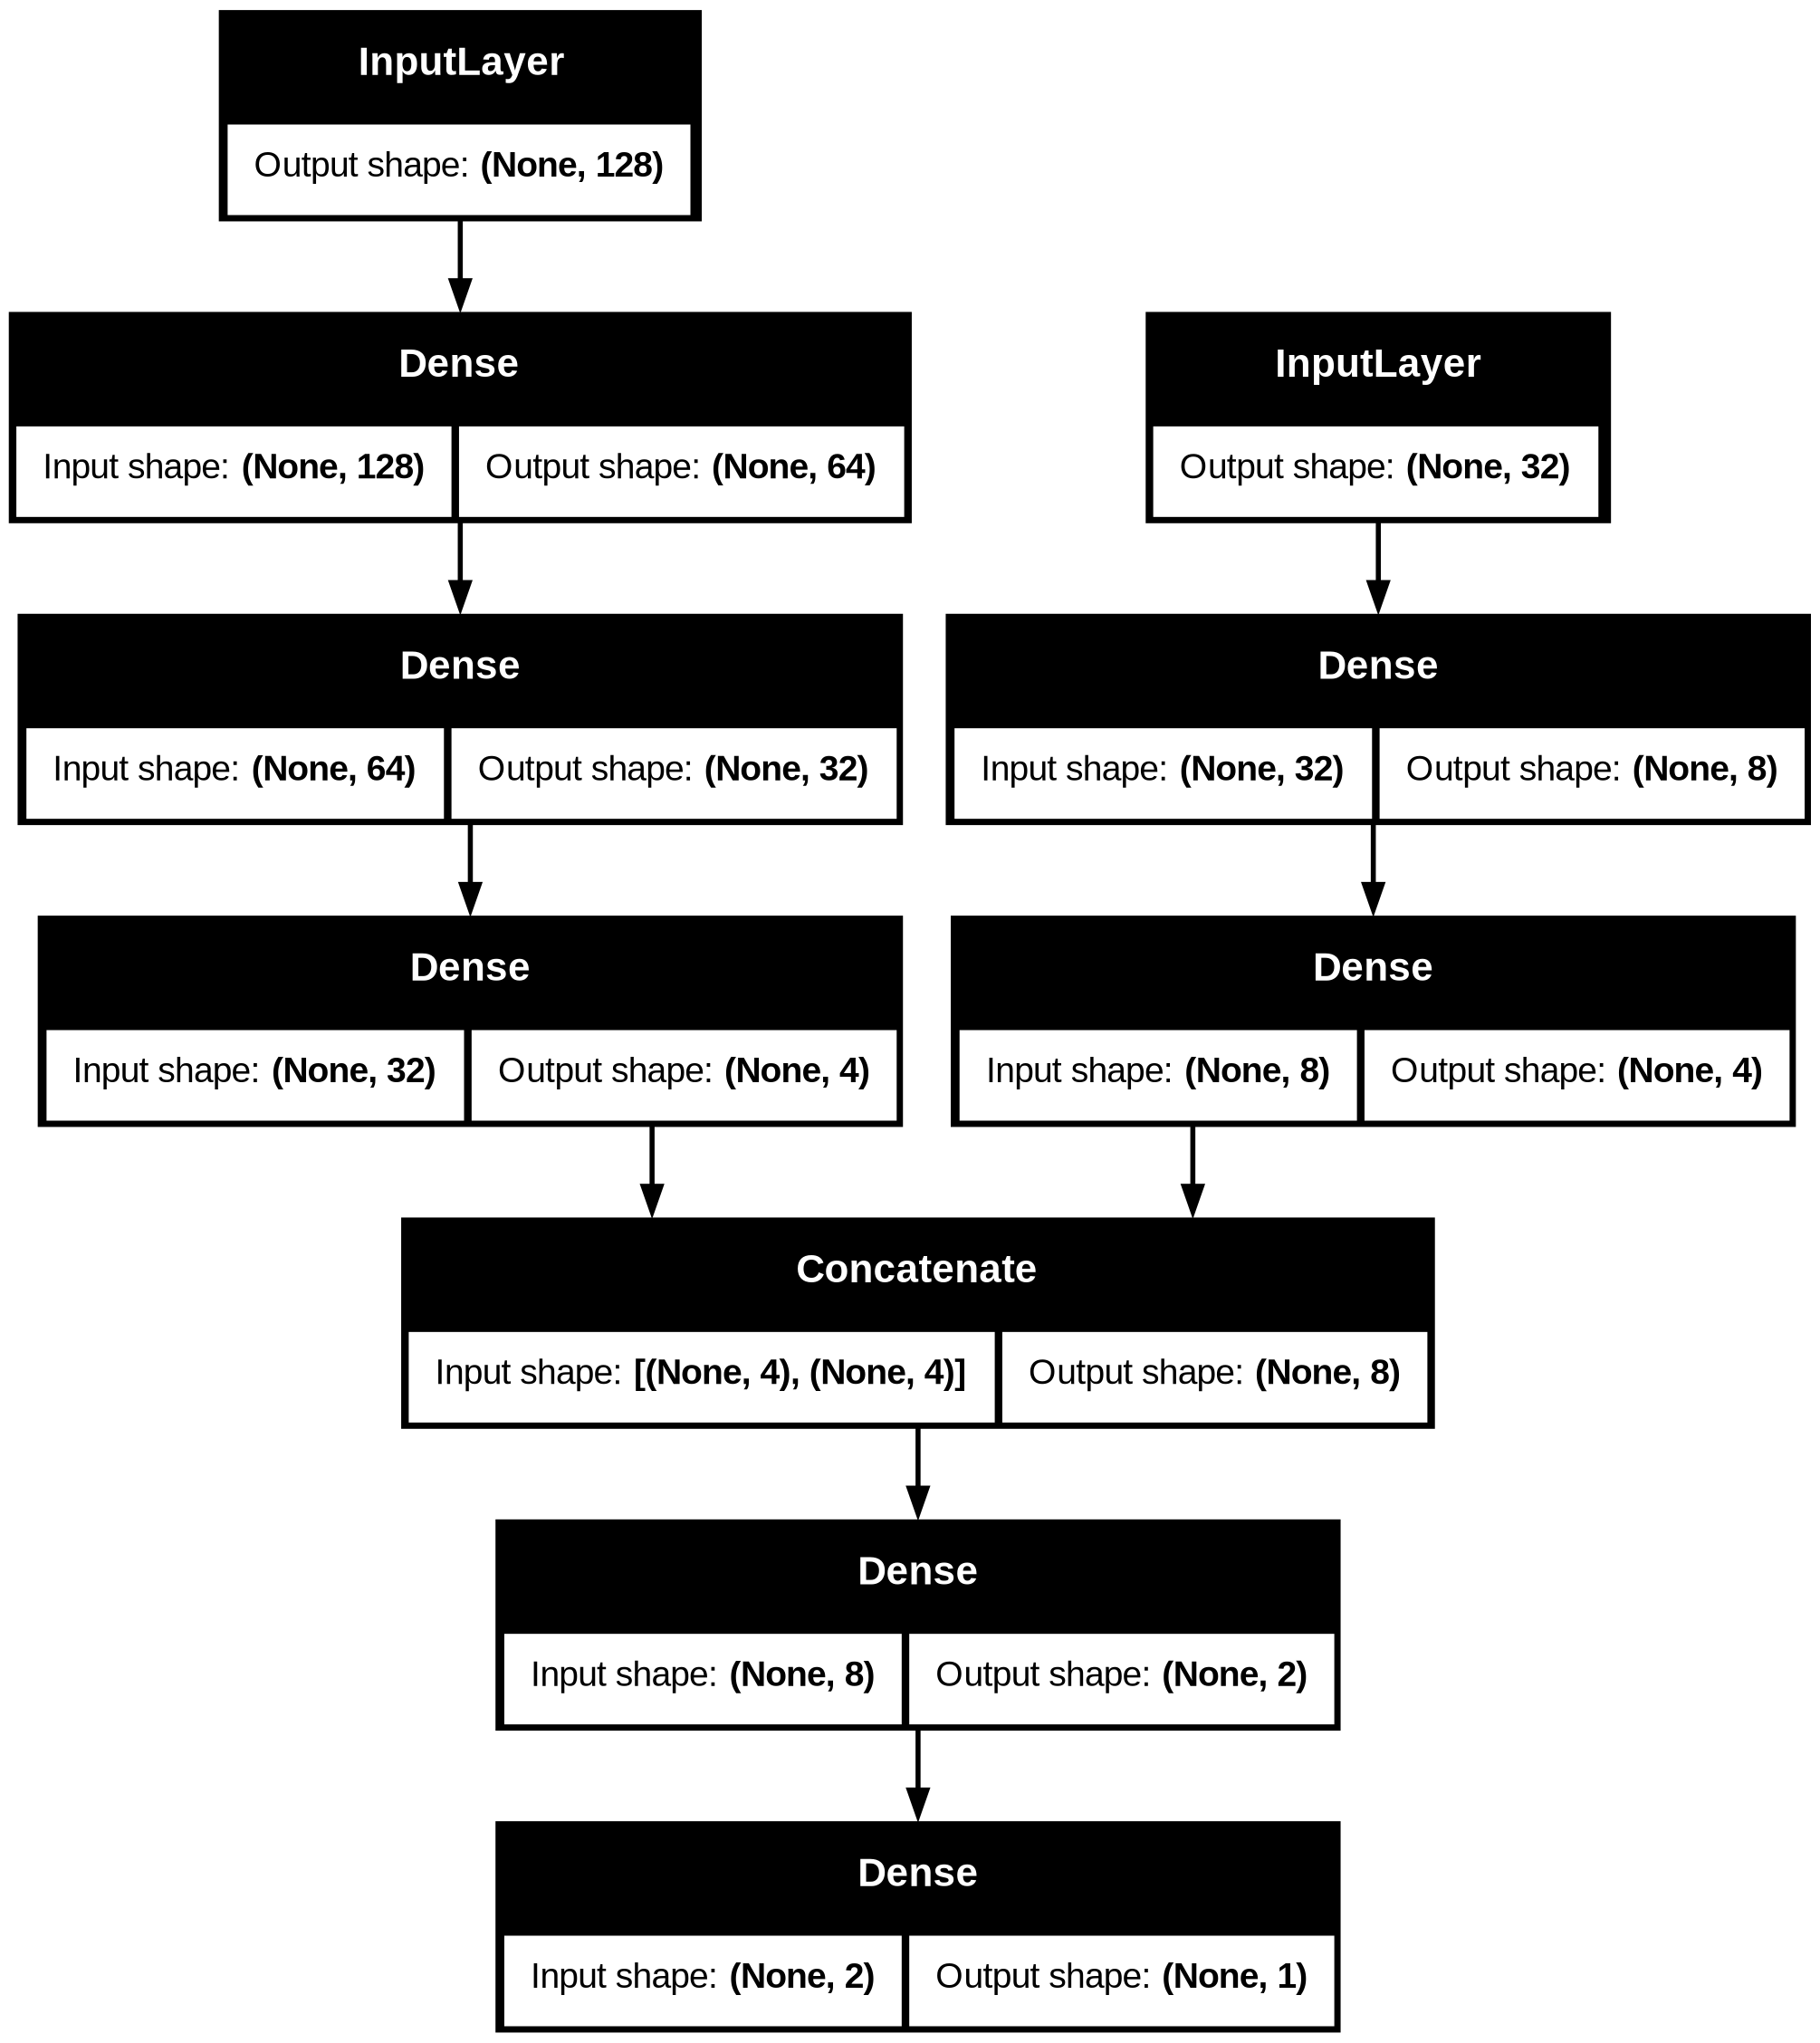

In [31]:
model = Model(inputs = [inputA, inputB], outputs = [z, z1])
model.summary()
plot_model(model, show_shapes=True)

In [32]:
# Multi Output Model

In [ ]:
# get the colab file 


!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

!kaggle datasets download -d jangedoo/utkface-new

import zipfile
zip = zipfile.ZipFile("/content/utkface-new.zip",'r')
zip.extractall("/content")
zip.close()

import os
import numpy as np
import pandas as pd
from keras.preprocessing.image import ImageDataGenerator

folder_path = '/content/utkface_aligned_cropped/UTKFace'

age=[]
gender=[]
img_path=[]
for file in os.listdir(folder_path):
  age.append(int(file.split('_')[0]))
  gender.append(int(file.split('_')[1]))
  img_path.append(file)

len(age)

df = pd.DataFrame({'age':age,'gender':gender,'img':img_path})

df.shape

df.head()

train_df = df.sample(frac=1,random_state=0).iloc[:20000]
test_df = df.sample(frac=1,random_state=0).iloc[20000:]

train_df.shape

test_df.shape

train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=30,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_dataframe(train_df,
                                                    directory=folder_path,
                                                    x_col='img',
                                                    y_col=['age','gender'],
                                                    target_size=(200,200),
                                                    class_mode='multi_output')

test_generator = test_datagen.flow_from_dataframe(test_df,
                                                    directory=folder_path,
                                                    x_col='img',
                                                    y_col=['age','gender'],
                                                    target_size=(200,200),
                                                  class_mode='multi_output')

from keras.applications.resnet50 import ResNet50
from keras.layers import *
from keras.models import Model

resnet = ResNet50(include_top=False, input_shape=(200,200,3))

resnet = ResNet50(include_top=False, input_shape=(200,200,3))

resnet.trainable=False

output = resnet.layers[-1].output

flatten = Flatten()(output)

dense1 = Dense(512, activation='relu')(flatten)
dense2 = Dense(512,activation='relu')(flatten)

dense3 = Dense(512,activation='relu')(dense1)
dense4 = Dense(512,activation='relu')(dense2)

output1 = Dense(1,activation='linear',name='age')(dense3)
output2 = Dense(1,activation='sigmoid',name='gender')(dense4)

model = Model(inputs=resnet.input,outputs=[output1,output2])

model.compile(optimizer='adam', loss={'age': 'mae', 'gender': 'binary_crossentropy'}, metrics={'age': 'mae', 'gender': 'accuracy'},loss_weights={'age':1,'gender':99})

model.fit(train_generator, batch_size=32, epochs=10, validation_data=test_generator)

